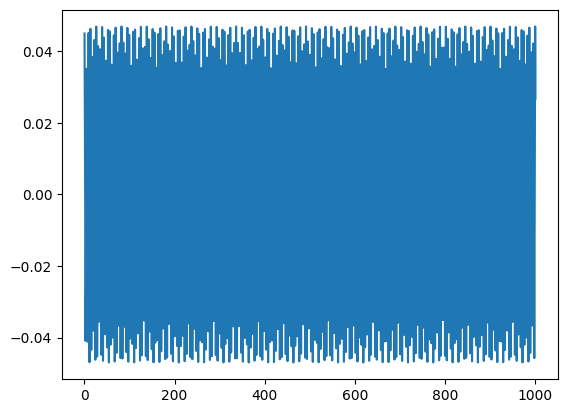

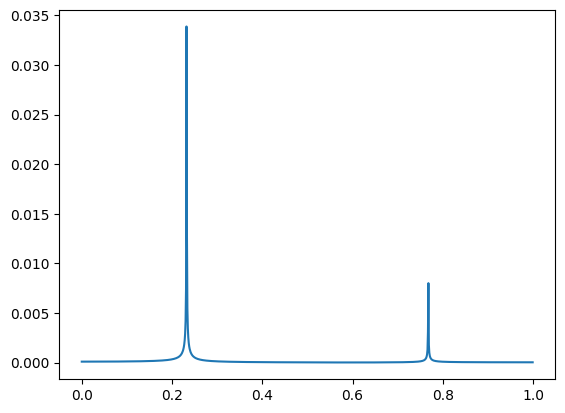

Tune from simulation data: 0.2320
Trace of M_rev: 0.2222222222222222
Betatron Tune from analytical solution: 0.2323


In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np
import matplotlib.pyplot as plt

def drift(L, plane='horizontal'):
    """Transfer matrix for drift space of length L.
    plane: 'horizontal' or 'vertical'
    """
    return np.array([[1, L], [0, 1]])

def quadrupole(f, plane='horizontal', focusing=True):
    """Transfer matrix for a thin lens quadrupole.
    f: focal length
    plane: 'horizontal' or 'vertical'
    focusing: True for focusing quad, False for defocusing quad
    """
    if plane == 'horizontal':
        if focusing:
            return np.array([[1, 0], [-1/f, 1]])
        else:
            return np.array([[1, 0], [1/f, 1]])
    elif plane == 'vertical':
        if focusing:
            return np.array([[1, 0], [1/f, 1]])  # Opposite sign to horizontal
        else:
            return np.array([[1, 0], [-1/f, 1]])  # Opposite sign to horizontal

def dipole(Ld, r, plane='horizontal'):
    """Transfer matrix for a dipole (bending magnet) with length Ld and bending radius r.
    plane: 'horizontal' or 'vertical'
    Typically, vertical plane is less affected by dipole.
    """
    theta = Ld / r
    
    if plane == 'horizontal':
        return np.array([
            [np.cos(theta), r*np.sin(theta)], 
            [-np.sin(theta)/r, np.cos(theta)]
        ])
    elif plane == 'vertical':
        # Vertical motion typically not directly influenced by horizontal dipoles
        # but a matrix is provided for completeness.
        return np.array([[1, Ld], [0, 1]])  # Like drift section, no focusing effect


# In[16]:


# Define lattice parameters
n_FODO = 4  # number of FODO cells
f = 15.0  # focal length of quadrupoles (meters)
Ld = 10.0  # length of dipoles (meters)
r = 10.0  # bending radius of dipoles (meters)
L_straight = 10.0  # length of straight section between quads and dipoles

# Horizontal motion transfer matrices
M_drift_h = drift(L_straight / 2, plane='horizontal')
M_focusing_quad_h = quadrupole(f, plane='horizontal', focusing=True)
M_defocusing_quad_h = quadrupole(f, plane='horizontal', focusing=False)
M_dipole_h = dipole(Ld, r, plane='horizontal')

# Vertical motion transfer matrices
M_drift_v = drift(L_straight / 2, plane='vertical')
M_focusing_quad_v = quadrupole(f, plane='vertical', focusing=True)
M_defocusing_quad_v = quadrupole(f, plane='vertical', focusing=False)
M_dipole_v = dipole(Ld, r, plane='vertical')


# In[25]:


# We will start with vertical motion only. Horizontal will be studied later.

# Construct first half of the FODO cell for vertical motion
M_FODO_v1 = (M_dipole_v @ M_drift_v @ M_focusing_quad_v @ M_drift_v)
M_FODO_v2 = (M_dipole_v @ M_drift_v @ M_defocusing_quad_v @ M_drift_v)

# initial position and angle
y = 1e-2     # y = 1 cm
y_pr = 1e-3  # y' = 1 mrad

Y = np.array([y, y_pr])

n_steps = 1000  # the particle will jump n_steps times through each fodo cell


# In[56]:


data = np.zeros(2*n_steps)  # data will be stored at half steps
rev = 0*data        # number of revolutions

for n in range(n_steps):
    Y = np.dot(M_FODO_v1, Y)
    rev[2*n] = n+0.5        # half revolution around the ring
    data[2*n] = Y[0]
    
    Y = np.dot(M_FODO_v2, Y)
    rev[2*n+1] = n+1.            # whole revolution around the ring
    data[2*n+1] = Y[0]


# In[57]:


plt.plot(rev, data)


# In[ ]:





# In[64]:


from scipy.fft import fft, fftfreq

# Step 2: Perform FFT on the uniformly sampled data
N = len(data)  # Number of samples
T = (rev[1] - rev[0])  # Sampling interval
yf = fft(data)  # FFT of y
xf = fftfreq(N, T)[:N//2]  # Corresponding frequency bins

plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='FFT of y(x)')
plt.show()

# In[ ]:





# In[ ]:





# In[78]:


from scipy.signal import find_peaks

# Assume xf and yf are already defined
# xf: Frequency values
# yf: FFT values (complex)

# Compute the magnitude spectrum
magnitude = 2.0 / N * np.abs(yf[:N//2])  # Ensure magnitude is for positive frequencies

# Find peaks in the magnitude spectrum
peaks, _ = find_peaks(magnitude, height=0.01)  # Adjust height threshold as needed
peak_frequencies = xf[peaks]
peak_magnitudes = magnitude[peaks]

# Print the peak frequencies and magnitudes
for freq, mag in zip(peak_frequencies, peak_magnitudes):
    print(f"Tune from simulation data: {freq:.4f}")


# In[79]:


M_rev = M_FODO_v2 @ M_FODO_v1

# Calculate the trace of the matrix
trace_M_rev = np.trace(M_rev)

# Calculate the tune
# Ensure the argument of arccos is in the range [-1, 1] due to numerical precision issues
argument = (trace_M_rev) / 2
argument = np.clip(argument, -1, 1)  # Clip to avoid errors due to floating-point precision
tune = 1. / (2 * np.pi) * np.arccos(argument)

print(f"Trace of M_rev: {trace_M_rev}")
print(f"Betatron Tune from analytical solution: {tune:.4f}")


# In[ ]:





In [2]:
len(rev)

2000

In [2]:
len(data)

2000

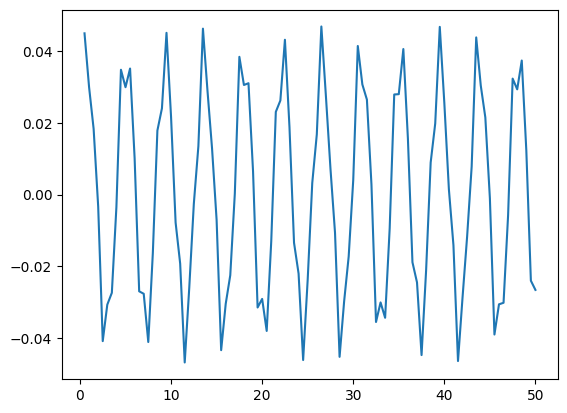

In [5]:
lim = 100
plt.plot(rev[:lim], data[:lim])

In [7]:
import numpy as np
from pylab import *

In [1]:
data = np.zeros(2*1000)  # data will be stored at half steps
rev = 0*data        # number of revolutions

for n in range(1000):
    rev[2*n] = n+0.5        # half revolution around the ring
    print("half: ", 2*n)
    
    rev[2*n+1] = n+1.            # whole revolution around the ring
    print("full: ", 2*n+1)

    break


NameError: name 'np' is not defined

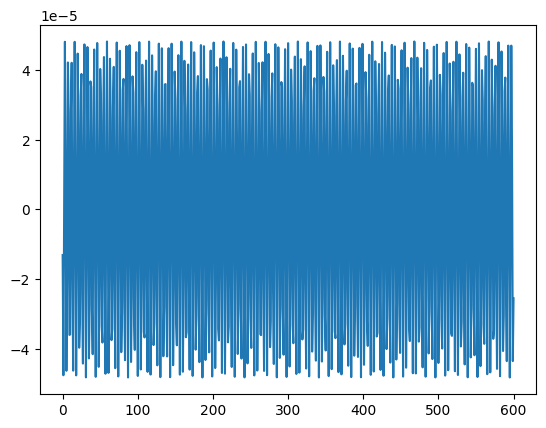

In [28]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

avg = moving_average(data[::2], 400)

plot(avg)